In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scripts.plot_results import parse_log_file


FMT_MAP = {
    "dim=10, armijo": ["v", "-", "#1f77b4"],
    "dim=100, armijo": ["v", "-", "#2ca02c"],
    "dim=1000, armijo": ["v", "-", "#ff7f0e"],
    "dim=10, wolf": ["^", "--", "#1f77b4"],
    "dim=100, wolf": ["^", "--", "#2ca02c"],
    "dim=1000, wolf": ["^", "--", "#ff7f0e"],
}



In [126]:
summary_table_list = {}

for i in [10, 100, 1000]:
    for method in ["armijo", "wolf"]:
        summary_table_list[f"dim={i}, {method}"] = pd.read_csv(
            f"problem_memo_output/kappa_100/Quadratic_dim_{i}/summary/{method}.txt",
            sep="\s+",
        )

summary_table_list["dim=10, armijo"].head()

,m,f,|gradf|,iter,CPU_time
0,1.0,-60.560438,1.901820e-08,5000.0,0.413268
1,2.0,-60.560438,5.050411e-08,5000.0,0.438651
2,5.0,-60.560438,1.007870e-07,5000.0,0.450946
3,NaN,-60.560438,3.692546e-08,5000.0,0.356809


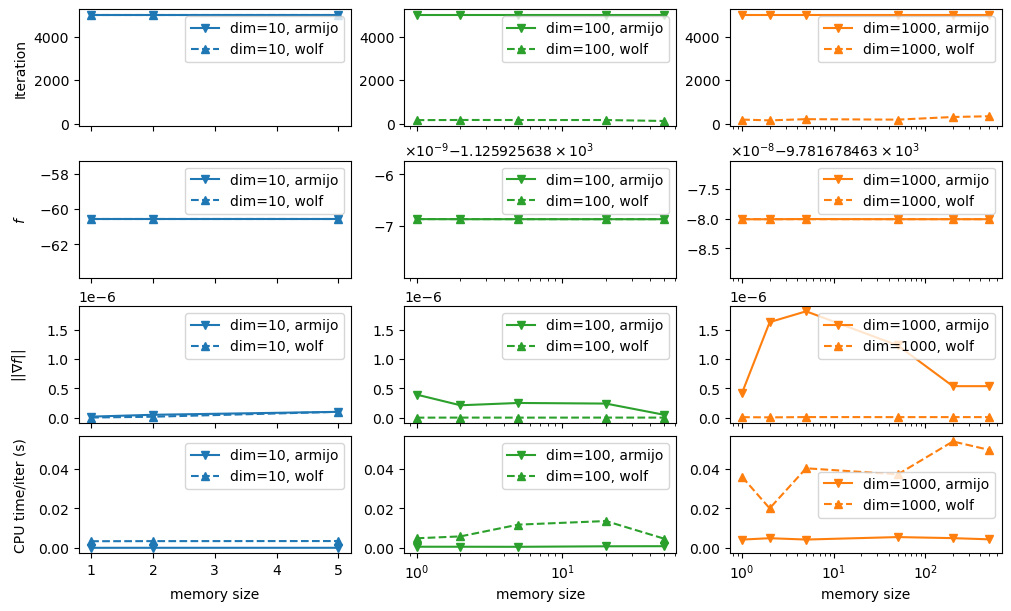

In [127]:
plt.close("all")
fig1, axs1 = plt.subplots(4, 3, figsize=[10, 6], layout="constrained")

for i, key in enumerate(summary_table_list.keys()):
    summary_table = summary_table_list[key]
    if i // 2 != 0:
        axs1[0, i//2].set_xscale('log')
        axs1[1, i//2].set_xscale('log')
        axs1[2, i//2].set_xscale('log')
        axs1[3, i//2].set_xscale('log')
    axs1[0, i // 2].plot(
        summary_table["m"][:-1],
        summary_table["iter"][:-1],
        marker=FMT_MAP[key][0],
        ls=FMT_MAP[key][1],
        color=FMT_MAP[key][2],
        label=key,
    )
    #axs1[0, i // 2].axhline(
    #    summary_table["iter"].iloc[-1], color="r", ls=FMT_MAP[key][1], label=key + " BFGS"
    #)
    axs1[0, i // 2].sharey(axs1[0, 0])
    axs1[0, i // 2].legend()
    axs1[0, i // 2].set_xticklabels(labels={})

    axs1[1, i // 2].plot(
        summary_table["m"][:-1],
        summary_table["f"][:-1],
        marker=FMT_MAP[key][0],
        ls=FMT_MAP[key][1],
        color=FMT_MAP[key][2],
        label=key,
    )
    #axs1[1, i // 2].axhline(
    #    summary_table["f"].iloc[-1], color="r", ls=FMT_MAP[key][1], label=key + " BFGS"
    #)
    axs1[1, i // 2].legend()
    axs1[1, i // 2].ticklabel_format(axis="y", useMathText=True)
    axs1[1, i // 2].set_xticklabels(labels={})

    axs1[2, i // 2].plot(
        summary_table["m"][:-1],
        summary_table["|gradf|"][:-1],
        marker=FMT_MAP[key][0],
        ls=FMT_MAP[key][1],
        color=FMT_MAP[key][2],
        label=key,
    )
    #axs1[2, i // 2].axhline(
    #    summary_table["|gradf|"].iloc[-1], color="r", ls=FMT_MAP[key][1], label=key + " BFGS"
    #)
    axs1[2, i // 2].sharey(axs1[2, 0])
    axs1[2, i // 2].legend()
    axs1[2, i // 2].set_xticklabels(labels={})

    cpu_time_per_iter = summary_table["CPU_time"] / summary_table["iter"]
    axs1[3, i // 2].plot(
        summary_table["m"][:-1],
        cpu_time_per_iter[:-1],
        marker=FMT_MAP[key][0],
        ls=FMT_MAP[key][1],
        color=FMT_MAP[key][2],
        label=key,
    )
    #axs1[3, i // 2].axhline(
    #    cpu_time_per_iter.iloc[-1], color="r", ls=FMT_MAP[key][1], label=key + " BFGS"
    #)
    axs1[3, i // 2].sharey(axs1[3, 0])
    axs1[3, i // 2].legend()
    axs1[3, i // 2].set_xlabel("memory size")




axs1[0, 0].set_ylabel("Iteration")
axs1[1, 0].set_ylabel("$f$")
axs1[2, 0].set_ylabel("||$\\nabla f||$")
axs1[3, 0].set_ylabel("CPU time/iter (s)")
fig1.align_labels()


In [128]:
fig1.savefig("quadratic_kappa_100.pdf", dpi=300, bbox_inches="tight")

In [187]:

iter_list = []
gradf_list = []

memory_sizes = [
    [1, 2, 5],
    [1, 2, 5, 20, 50],
    [1, 2, 5, 50, 200, 500],
   # [1, 2, 5, 50, 500, 2000, 5000]

]

COLOR_MAP = [
    "#1f77b4",               
    "#2ca02c",   
    "#ff7f0e",         
    "#d62728",             
    "#8d5dba",            
    "#8c564b",     
    "#9467bd" 
]

LINESTYLE_MAP = {
    "armijo": '-',
    "wolf": '--'
}





Text(0.5, 0.01, 'Iteration')

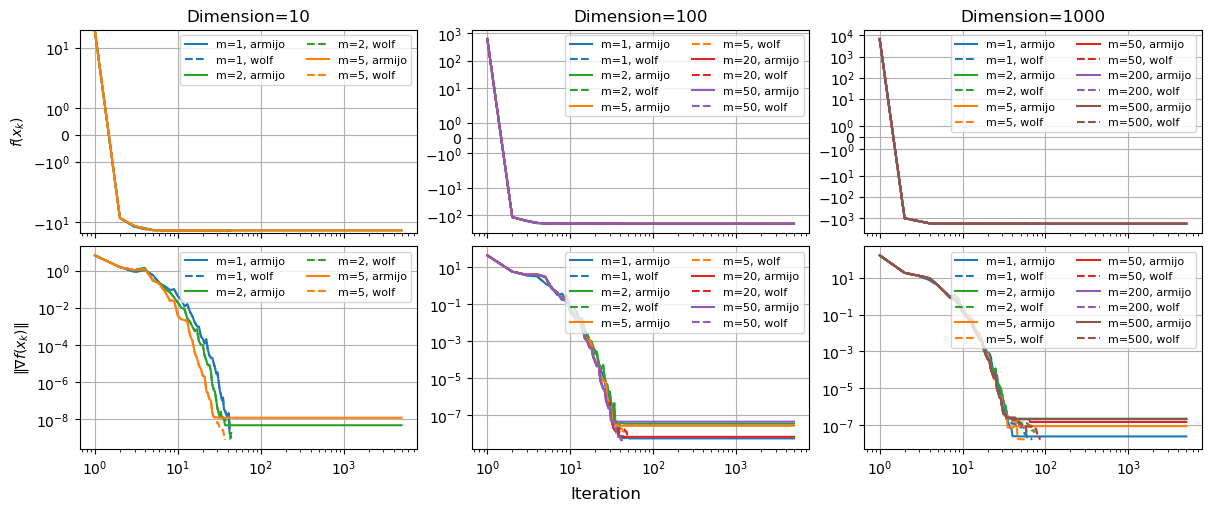

In [192]:
kappa=10
plt.close('fig2')
fig2, axs2 = plt.subplots(2, 3, figsize=[12, 5], layout='constrained', sharex=True)

for i, n in enumerate([10, 100, 1000]):

    for j, m in enumerate(memory_sizes[i]):
        for method in ['armijo', 'wolf']:
            iter, f, gradf = parse_log_file(
                f"problem_memo_output/kappa_{kappa}/Quadratic_dim_{n}/{method}_m{m}.txt"
            )
            axs2[0, i].plot(iter, f, color=COLOR_MAP[j], ls=LINESTYLE_MAP[method], label=f"m={m}, {method}")
            axs2[1, i].plot(iter, gradf, color=COLOR_MAP[j], ls=LINESTYLE_MAP[method], label=f"m={m}, {method}")
    axs2[0, i].set_xscale('log')
    axs2[0, i].set_title(f"Dimension={n}")
    axs2[0, i].set_yscale('symlog')
    axs2[1, i].set_xscale('log')
    axs2[1, i].set_yscale('log')
    axs2[0, i].grid('on')
    axs2[0, i].legend(ncol=2, fontsize=8)
    axs2[1, i].grid("on")
    axs2[1, i].legend(ncol=2, fontsize=8)

axs2[0, 0].set_ylabel("$f(x_k)$")
axs2[1, 0].set_ylabel("$\| \\nabla f(x_k) \|$")
fig2.supxlabel("Iteration")

In [193]:
fig2.savefig(f"conv_kappa_{kappa}.pdf", dpi=300, bbox_inches='tight')

In [2]:
memory_sizes = [
    [1, 2, 5],
    [1, 2, 5, 20, 50],
    [1, 2, 5, 50, 200, 500],
   # [1, 2, 5, 50, 500, 2000, 5000]

]

COLOR_MAP = [
    "#1f77b4",               
    "#2ca02c",   
    "#ff7f0e",         
    "#d62728",             
    "#8d5dba",            
    "#8c564b",     
    "#9467bd" 
]

LINESTYLE_MAP = {
    "armijo": '-',
    "wolf": '--'
}


def get_step_from_file(path: str):
    iters = []
    alphas = []

    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            # Skip possible header / separator lines
            if line.startswith("Iter") or line.startswith("-"):
                continue

            parts = line.split()
            if len(parts) < 3:
                continue

            try:
                iterk = float(parts[0])
                alphak = float(parts[3])
            except ValueError:
                continue
            alphas.append(alphak)
            iters.append(iterk)

    if len(alphas) == 0:
        return None

    return np.array(iters), np.array(alphas)

Text(0.5, 0.01, 'Iteration')

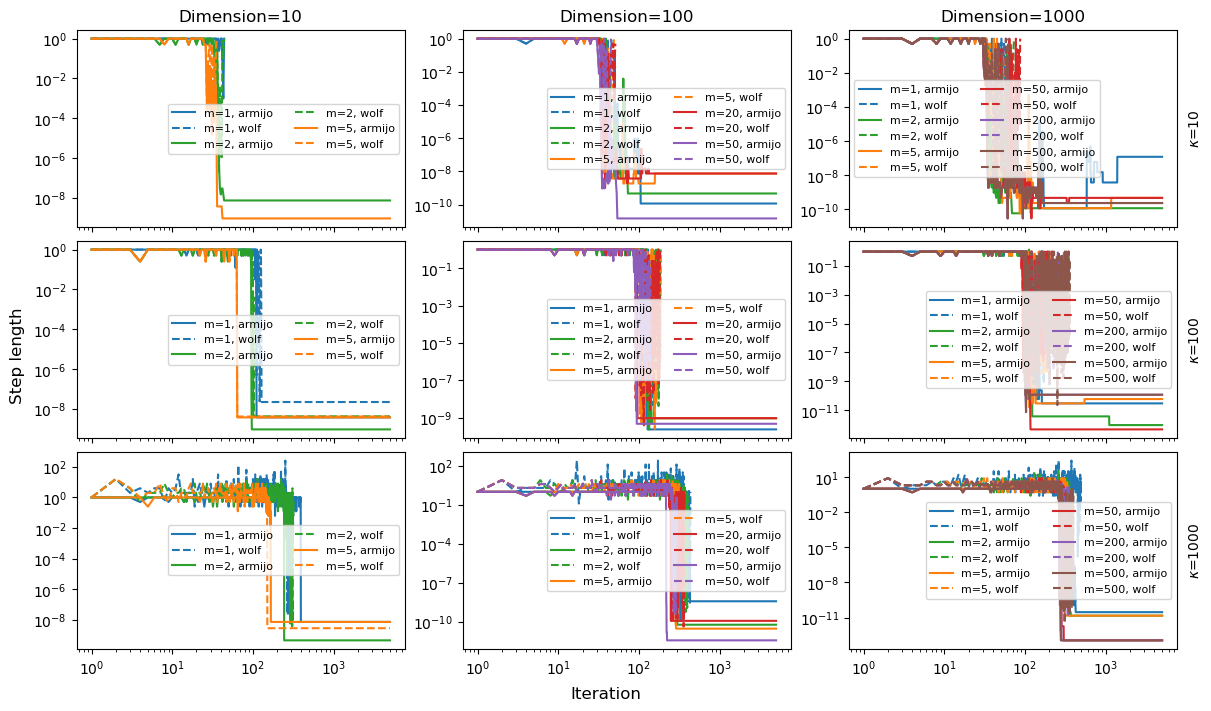

In [5]:
kappas = [10, 100, 1000]
plt.close('fig3')
fig3, axs3 = plt.subplots(3, 3, figsize=[12, 7], layout='constrained', sharex=True)
for p, k in enumerate(kappas):
    for i, n in enumerate([10, 100, 1000]):
        for j, m in enumerate(memory_sizes[i]):
            for method in ['armijo', 'wolf']:
                iter, alpha = get_step_from_file(
                    f"problem_memo_output/kappa_{k}/Quadratic_dim_{n}/{method}_m{m}.txt"
                )
                axs3[p, i].plot(iter, alpha, color=COLOR_MAP[j], ls=LINESTYLE_MAP[method], label=f"m={m}, {method}")
        axs3[p, i].set_xscale('log')
        axs3[p, i].set_yscale('log')
        axs3[p, i].legend(ncol=2, fontsize=8)
        if p == 0:
            axs3[0, i].set_title(f"Dimension={n}")
        if i == 2:
            axs3[p, i].text(
                1.075,
                0.5,
                f"$\kappa$={k}",
                ha='right',
                va='center',
                transform=axs3[p, i].transAxes,
                rotation=90
            )

fig3.supylabel("Step length")
fig3.supxlabel("Iteration")

In [6]:
fig3.savefig("step_size.pdf", dpi=300, bbox_inches='tight')

In [7]:
COLOR_MAP = [
    "#1f77b4",               
    "#2ca02c",   
    "#ff7f0e",         
]

LINESTYLE_MAP = {
    "armijo": '-',
    "wolf": '--'
}

MARKER_MAP = {
    "armijo": 'v',
    "wolf": '^'
}

Text(0.02, 0.5, 'CPU time / iteration (s)')

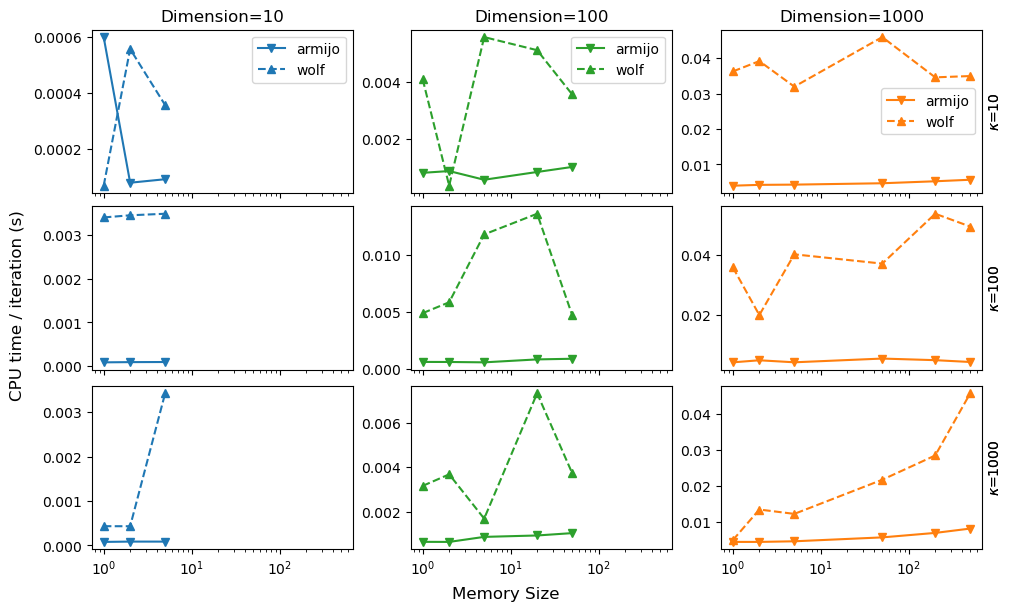

In [181]:
plt.close("fig4")
fig4, axs4 = plt.subplots(3, 3, figsize=[10, 6], layout="constrained", sharex=True)
for p, k in enumerate([10, 100, 1000]):
    for i, n in enumerate([10, 100, 1000]):
        for method in ["armijo", "wolf"]:
            summary_table = pd.read_csv(
                f"problem_memo_output/kappa_{k}/Quadratic_dim_{n}/summary/{method}.txt",
                sep="\s+",
            )
            cpu_time_per_iter = summary_table["CPU_time"] / summary_table["iter"]
            if p == 0:
                axs4[p, i].plot(
                    summary_table["m"][:-1],
                    cpu_time_per_iter[:-1],
                    marker=MARKER_MAP[method],
                    ls=LINESTYLE_MAP[method],
                    color=COLOR_MAP[i],
                    label=method
                )
                axs4[p, i].set_title(f"Dimension={n}")
                axs4[p, i].legend()
            else:
                 axs4[p, i].plot(
                    summary_table["m"][:-1],
                    cpu_time_per_iter[:-1],
                    marker=MARKER_MAP[method],
                    ls=LINESTYLE_MAP[method],
                    color=COLOR_MAP[i],
                    label=method
                )
            axs4[p, i].set_xscale('log')

            if i == 2:
                axs4[p, i].text(
                    1.075,
                    0.5,
                    f"$\kappa$={k}",
                    ha='right',
                    va='center',
                    transform=axs4[p, i].transAxes,
                    rotation=90
                )

fig4.supxlabel("Memory Size")
fig4.supylabel("CPU time / iteration (s)")


In [182]:
fig4.savefig("cpu_time.pdf", dpi=300, bbox_inches='tight')